<a href="https://colab.research.google.com/github/MOHAMED01ASFAK/DataScience_Project/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:

data = pd.read_csv("/content/creditcard.csv")

In [3]:

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:

print(data.shape)
print(data.describe())

(89220, 31)
               Time            V1            V2            V3            V4  \
count  89220.000000  89220.000000  89220.000000  89220.000000  89220.000000   
mean   39715.015501     -0.265000     -0.039318      0.678729      0.162808   
std    16026.485819      1.873458      1.662182      1.352995      1.359523   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    32165.000000     -1.028772     -0.603310      0.182821     -0.719037   
50%    42017.000000     -0.262209      0.071676      0.760383      0.185833   
75%    52274.250000      1.152744      0.727352      1.386516      1.037554   
max    62480.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  89220.000000  89220.000000  89220.000000  89220.000000  89219.000000   
mean      -0.278291      0.094282     -0.109561      0.054698     -0.028905   
std        1.370149      1.302130      

In [5]:

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0023705734316016537
Fraud Cases: 211
Valid Transactions: 89008


In [9]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


,Amount
count,211.000000
mean,106.714360
std,242.747461
min,0.000000
25%,1.000000
50%,7.580000
75%,99.990000
max,1809.680000


In [10]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,89008.000000
mean,98.512943
std,266.997060
min,0.000000
25%,7.680000
50%,26.990000
75%,89.900000
max,19656.530000


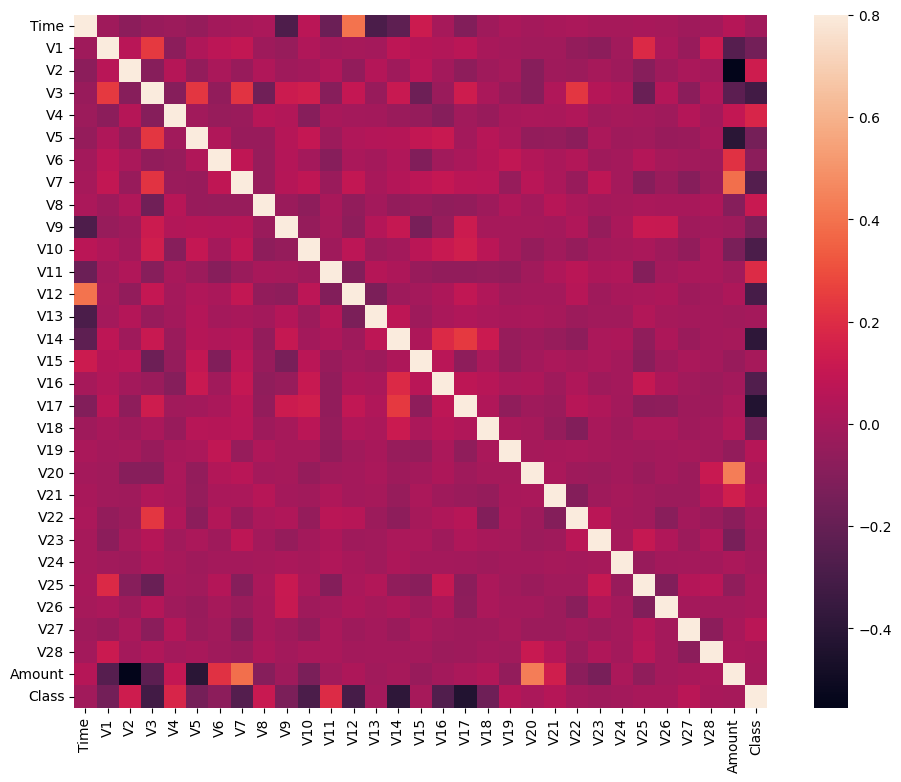

In [11]:

corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [12]:

X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(89220, 30)
(89220,)


In [13]:

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [14]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [22]:

min_length = min(len(yTest), len(yPred))
yTest = yTest[:min_length]
yPred = yPred[:min_length]

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))






The accuracy is 0.9960208485120216
The precision is 0.32608695652173914
The recall is 0.2727272727272727
The F1-Score is 0.297029702970297
The Matthews correlation coefficient is0.2962354845736489


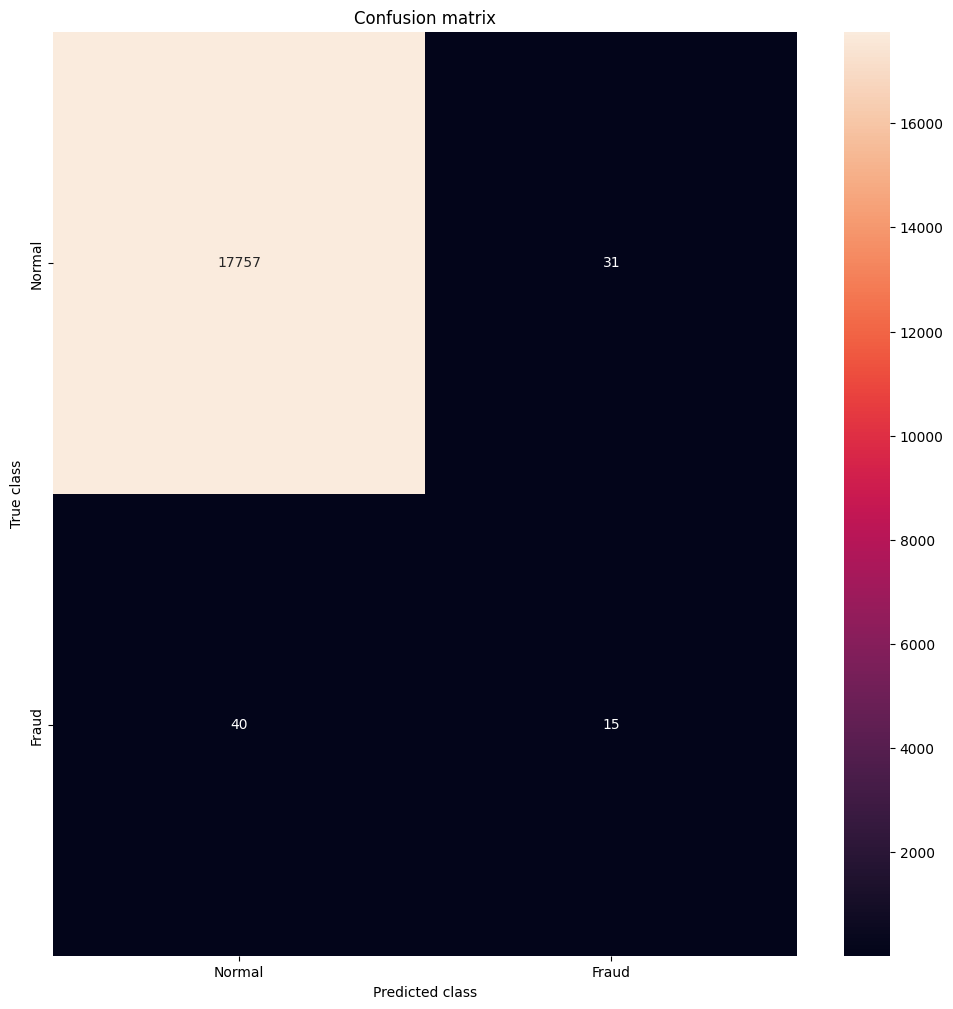

In [23]:

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()